In [1]:
%matplotlib inline
import os

import cftime

import xarray as xr
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import cmocean

import cartopy
import cartopy.crs as ccrs

import esmlab

import intake
import intake_esm
import ncar_jobqueue
from dask.distributed import Client
from pint import UnitRegistry

units = UnitRegistry()
units.define('micromoles_per_kilogram = umol / kg') # used in WOA datasets

%load_ext watermark
%watermark -a "Mike Levy" -d -iv -m -g -h

matplotlib    3.1.2
numpy         1.17.3
cartopy       0.17.0
esmlab        2019.4.27.post55
intake_esm    2019.10.15.post40
intake        0.5.3
cmocean       2.0
cftime        1.0.3.4
ncar_jobqueue 2019.10.16.1
xarray        0.14.0
Mike Levy 2019-12-05 

compiler   : GCC 7.3.0
system     : Linux
release    : 3.10.0-693.21.1.el7.x86_64
machine    : x86_64
processor  : x86_64
CPU cores  : 72
interpreter: 64bit
host name  : casper11
Git hash   : daa09a5558eb797b4de393343734278713a6100f


In [2]:
cluster = ncar_jobqueue.NCARCluster(project='P93300606')
client = Client(cluster)
client

/glade/work/mlevy/miniconda3/envs/cesm2-marbl/lib/python3.7/site-packages/distributed/dashboard/core.py:72: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


Client Scheduler: tcp://128.117.181.217:38446 Dashboard: https://jupyterhub.ucar.edu/dav/user/mlevy/proxy/35972/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [3]:
cluster.scale(4)

In [4]:
catalog = intake.open_esm_datastore('/glade/work/mlevy/intake-esm-collection/json/glade-cesm1-lens-timeseries.json')

In [5]:
lens_test = catalog.search(experiment=['20C', '20C_BGC'], component='ocn', variable='O2_ZMIN')
lens_test.df

,experiment,case,component,stream,variable,date_range,member_id,path,ctrl_branch_year,ctrl_experiment,ctrl_member_id
0,20C_BGC,b.e11.B20TRC5CNBDRD.f09_g16.001,ocn,pop.h,O2_ZMIN,185001-200512,1,/glade/collections/cdg/data/cesmLE/CESM-CAM5-B...,-2147483647,piControl,1
1,20C,b.e11.B20TRC5CNBDRD.f09_g16.001,ocn,pop.h,O2_ZMIN,185001-200512,1,/glade/collections/cdg/data/cesmLE/CESM-CAM5-B...,-2147483647,piControl,1
2,20C_BGC,b.e11.B20TRC5CNBDRD.f09_g16.002,ocn,pop.h,O2_ZMIN,192001-200512,2,/glade/collections/cdg/data/cesmLE/CESM-CAM5-B...,-2147483647,piControl,1
3,20C,b.e11.B20TRC5CNBDRD.f09_g16.002,ocn,pop.h,O2_ZMIN,192001-200512,2,/glade/collections/cdg/data/cesmLE/CESM-CAM5-B...,-2147483647,piControl,2
4,20C_BGC,b.e11.B20TRC5CNBDRD.f09_g16.009,ocn,pop.h,O2_ZMIN,192001-200512,9,/glade/collections/cdg/data/cesmLE/CESM-CAM5-B...,-2147483647,piControl,1
...,...,...,...,...,...,...,...,...,...,...,...
61,20C,b.e11.B20TRC5CNBDRD.f09_g16.103,ocn,pop.h,O2_ZMIN,192001-200512,103,/glade/collections/cdg/data/cesmLE/CESM-CAM5-B...,-2147483647,piControl,1
62,20C_BGC,b.e11.B20TRC5CNBDRD.f09_g16.104,ocn,pop.h,O2_ZMIN,192001-200512,104,/glade/collections/cdg/data/cesmLE/CESM-CAM5-B...,-2147483647,piControl,1
63,20C,b.e11.B20TRC5CNBDRD.f09_g16.104,ocn,pop.h,O2_ZMIN,192001-200512,104,/glade/collections/cdg/data/cesmLE/CESM-CAM5-B...,-2147483647,piControl,1
64,20C_BGC,b.e11.B20TRC5CNBDRD.f09_g16.105,ocn,pop.h,O2_ZMIN,192001-200512,105,/glade/collections/cdg/data/cesmLE/CESM-CAM5-B...,-2147483647,piControl,1


In [6]:
dq = lens_test.to_dataset_dict(cdf_kwargs={'chunks':{'time': 48}})
dq

--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream'

--> There will be 2 group(s)


{'ocn.20C.pop.h': <xarray.Dataset>
 Dimensions:               (d2: 2, lat_aux_grid: 395, member_id: 34, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 1872, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
 Coordinates:
     ULONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
     TLONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
     ULAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
     TLAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
   * lat_aux_grid          (lat_aux_grid) float32 -79.48815 -78.952896 ... 90.0
   * time                  (time) object 1850-02-01 00:00:00 ... 2006-01-01 00:00:00
   * z_w                   (z_w) float32 0.0 1000.0 2000.0 ... 500004.7 525000.94
   * moc_z                 (moc_z) float32 0.0 1000.0 ... 525000.94 549999.06
   * z_t    

In [7]:
# Lots of data in the dataset is un-necessary -- these are the variables we really want to keep
keep_vars = ['REGION_MASK', 'z_t', 'dz', 'TAREA', 'TLONG', 'TLAT', 'time', 'time_bound', 'member_id', 'O2_ZMIN']

ds = dict()
for exp in ['20C', '20C_BGC']:
    # This should return everything from 1990s (01-15 instead of 01-01 looks weird but it's due to how date stamps / time bounds are kept)
    time_slice = slice('1990-01-15', '2000-01-15')
    ds[exp] = dq['ocn.{}.pop.h'.format(exp)]
    ds[exp] = ds[exp].drop([v for v in ds[exp].variables if v not in keep_vars]).sel(time=time_slice).mean(dim=['member_id', 'time'])

ds

{'20C': <xarray.Dataset>
 Dimensions:      (nlat: 384, nlon: 320, z_t: 60)
 Coordinates:
     TLONG        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
     TLAT         (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
   * z_t          (z_t) float32 500.0 1500.0 2500.0 ... 512502.8 537500.0
 Dimensions without coordinates: nlat, nlon
 Data variables:
     dz           (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
     REGION_MASK  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
     TAREA        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
     O2_ZMIN      (nlat, nlon) float32 dask.array<chunksize=(384, 320), meta=np.ndarray>
 Attributes:
     nsteps_total:              750
     tavg_sum:                  2592000.0
     nco_openmp_thread_number:  1
     intake_esm_varname:        O2_ZMIN
     calendar:                  All years have exactly  365 days.
     history:          

CPU times: user 927 ms, sys: 88 ms, total: 1.02 s
Wall time: 7.5 s


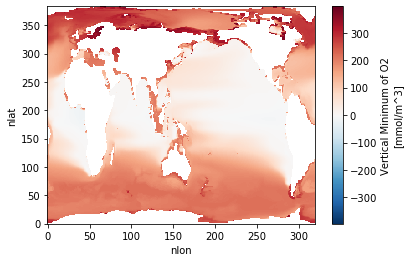

In [8]:
%%time

ds['20C'].O2_ZMIN.plot()

CPU times: user 1.16 s, sys: 98 ms, total: 1.25 s
Wall time: 6.27 s


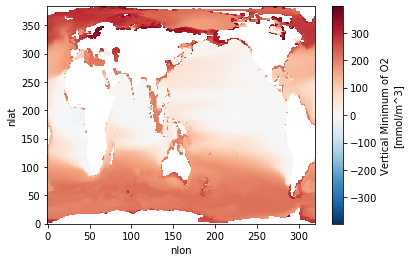

In [9]:
%%time

ds['20C_BGC'].O2_ZMIN.plot()